<a href="https://colab.research.google.com/github/Quang-Trong-Tan-Loc/AI/blob/main/BT11_classify_food_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from os import listdir
from numpy import asarray
from numpy import save
import numpy as np
from keras.utils import load_img, img_to_array
from keras.utils import to_categorical

In [4]:
folder = '/content/drive/MyDrive/Data_CNN/Train/food'
food = ['Hu tieu', 'Com tam', 'Ca kho to', 'Bun dau mam tom', 'Banh pia', 'Goi cuon', 'Chao long','Bun rieu','Banh trang nuong','Banh khot']
photos, lables = list(), list()
for i in range (10):
  filename = folder +'/'+ food[i] + '/'
  for file in listdir (filename):
    photo = load_img (filename + file, target_size=(128,128))
    photo = img_to_array(photo)
    photos.append(photo)
    lables.append(i)
photos = asarray(photos)
lables = asarray(lables)

In [5]:
print(photos.shape)
print(lables.shape)

(6064, 128, 128, 3)
(6064,)


In [6]:
from keras.utils import to_categorical
y = to_categorical(lables)
print(y.shape)

(6064, 10)


In [7]:
train_X = photos.astype('float32')/255


In [8]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, Input
from keras.optimizers import Adam #toc do hoc 0.01 with Adam
from keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt

In [9]:
batch_size = 64
epochs = 10
classes = 10

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3), activation= 'linear', input_shape= (128,128,3), padding = 'same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(Flatten())
#-----------------------------------------------------------------------------------------------------------
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))
model.compile(loss = categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'] )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [11]:
train = model.fit(train_X, y, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/10
95/95 [==============================] - 15s 48ms/step - loss: 2.4368 - accuracy: 0.2086
Epoch 2/10
95/95 [==============================] - 4s 43ms/step - loss: 1.7359 - accuracy: 0.3941
Epoch 3/10
95/95 [==============================] - 4s 43ms/step - loss: 1.4606 - accuracy: 0.4964
Epoch 4/10
95/95 [==============================] - 4s 41ms/step - loss: 1.1098 - accuracy: 0.6250
Epoch 5/10
95/95 [==============================] - 4s 41ms/step - loss: 0.6637 - accuracy: 0.7822
Epoch 6/10
95/95 [==============================] - 4s 44ms/step - loss: 0.2689 - accuracy: 0.9175
Epoch 7/10
95/95 [==============================] - 4s 41ms/step - loss: 0.1232 - accuracy: 0.9645
Epoch 8/10
95/95 [==============================] - 4s 41ms/step - loss: 0.0434 - accuracy: 0.9901
Epoch 9/10
95/95 [==============================] - 4s 44ms/step - loss: 0.0379 - accuracy: 0.9931
Epoch 10/10
95/95 [==============================] - 4s 41ms/step - loss: 0.0203 - accuracy: 0.9957


In [15]:
folder = '/content/drive/MyDrive/Data_CNN/Test/food'
food = ['Hu tieu', 'Com tam', 'Ca kho to', 'Bun dau mam tom', 'Banh pia', 'Goi cuon', 'Chao long','Bun rieu','Banh trang nuong','Banh khot']
X_test, y_test = list(), list()
for i in range (10):
  filename = folder +'/'+ food[i] + '/'
  for file in listdir (filename):
    photo = load_img (filename + file, target_size=(128,128))
    photo = img_to_array(photo)
    X_test.append(photo)
    y_test.append(i)
X_test = asarray(X_test)
y_test = asarray(y_test)

In [16]:
print(X_test.shape)
print(y_test.shape)

(1608, 128, 128, 3)
(1608,)


In [17]:
from keras.utils import to_categorical
y_test = to_categorical(y_test)
X_test = X_test.astype('float32')/255

In [18]:
print(X_test.shape)
print(y_test.shape)

(1608, 128, 128, 3)
(1608, 10)


In [19]:
model.evaluate(X_test, y_test)

51/51 [==============================] - 1s 15ms/step - loss: 3.0110 - accuracy: 0.4969


[3.0109689235687256, 0.4968905448913574]

1/1 [==============================] - 0s 27ms/step
Ca kho to
Hu tieu


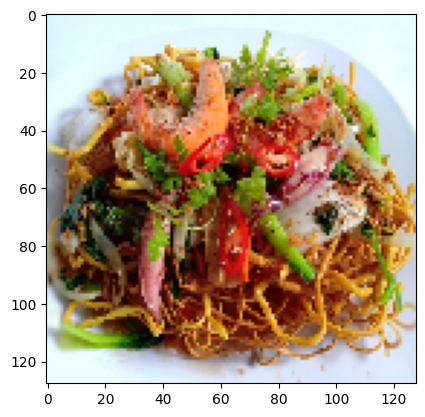

In [22]:
n = 50
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape((1, 128, 128,3)))
print(food[pred.argmax()])
print(food[y_test[n].argmax()])